# IT 6773

# K-Nearest Neighbors
#### Ref: nickmccullum.com

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
#Reading data from classified_data.csv file
raw_data = pd.read_csv('classified_data.csv')
print(raw_data.columns)

Index(['Unnamed: 0', 'WTT', 'PTI', 'EQW', 'SBI', 'LQE', 'QWG', 'FDJ', 'PJF',
       'HQE', 'NXJ', 'TARGET CLASS'],
      dtype='object')


In [5]:
#Dropping Unnamed column
raw_data = pd.read_csv('classified_data.csv', index_col = 0)
print(raw_data.columns)

Index(['WTT', 'PTI', 'EQW', 'SBI', 'LQE', 'QWG', 'FDJ', 'PJF', 'HQE', 'NXJ',
       'TARGET CLASS'],
      dtype='object')


In [6]:
#Standardizing the Data Set
#Since the K nearest neighbors algorithm makes predictions about a data point by using the observations 
#that are closest to it, the scale of the features within a data set matters a lot.
#Because of this, machine learning practitioners typically standardize the data set, 
#which means adjusting every x value so that they are roughly on the same scale.
from sklearn.preprocessing import StandardScaler

In [7]:
#Create an instance of the StandardScaler class named scaler 
scaler = StandardScaler()

In [8]:
#Train this instance on our data set using the fit method
scaler.fit(raw_data.drop('TARGET CLASS', axis=1))

StandardScaler()

In [9]:
#We can use the transform method to standardize all of the features in the data set 
#so they are roughly the same scale
scaled_features = scaler.transform(raw_data.drop('TARGET CLASS', axis=1))

In [10]:
scaled_data = pd.DataFrame(scaled_features, columns = raw_data.drop('TARGET CLASS', axis=1).columns)

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
x = scaled_data
y = raw_data['TARGET CLASS']

In [13]:
x_training_data, x_test_data, y_training_data, y_test_data = train_test_split(x, y, test_size = 0.3)

In [14]:
from sklearn.neighbors import KNeighborsClassifier

In [131]:
model = KNeighborsClassifier(n_neighbors = 1, metric='euclidean')

In [132]:
model.fit(x_training_data, y_training_data)

KNeighborsClassifier(metric='euclidean', n_neighbors=1)

In [133]:
predictions = model.predict(x_test_data)

In [134]:
from sklearn.metrics import classification_report

from sklearn.metrics import confusion_matrix

In [135]:
print(classification_report(y_test_data, predictions))

              precision    recall  f1-score   support

           0       0.91      0.87      0.89       153
           1       0.87      0.91      0.89       147

    accuracy                           0.89       300
   macro avg       0.89      0.89      0.89       300
weighted avg       0.89      0.89      0.89       300



In [136]:
print(confusion_matrix(y_test_data, predictions))

[[133  20]
 [ 13 134]]


<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

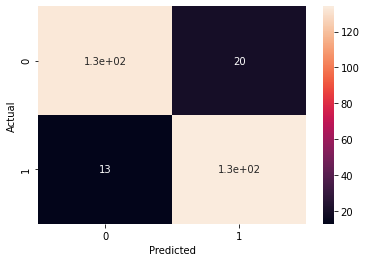

In [62]:
#Create Confusing Matrix
confusion_matrix = pd.crosstab(y_test_data, predictions, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)

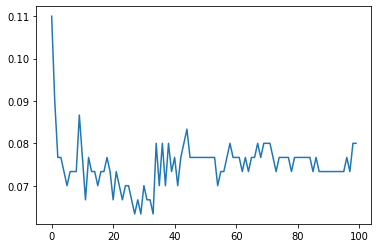

In [63]:
error_rates = []
for i in np.arange(1, 101):

    new_model = KNeighborsClassifier(n_neighbors = i)

    new_model.fit(x_training_data, y_training_data)

    new_predictions = new_model.predict(x_test_data)

    error_rates.append(np.mean(new_predictions != y_test_data))
    
plt.plot(error_rates)

In [109]:
model = KNeighborsClassifier(n_neighbors = 5, metric='euclidean')

In [110]:
model.fit(x_training_data, y_training_data)

KNeighborsClassifier(metric='euclidean')

In [111]:
predictions = model.predict(x_test_data)

In [112]:
print(classification_report(y_test_data, predictions))

              precision    recall  f1-score   support

           0       0.93      0.92      0.93       153
           1       0.92      0.93      0.93       147

    accuracy                           0.93       300
   macro avg       0.93      0.93      0.93       300
weighted avg       0.93      0.93      0.93       300



In [113]:
print(confusion_matrix(y_test_data, predictions))


[[141  12]
 [ 10 137]]


In [119]:
model = KNeighborsClassifier(n_neighbors = 1, algorithm = 'ball_tree', leaf_size = 40, metric='euclidean')

In [120]:
model.fit(x_training_data, y_training_data)

KNeighborsClassifier(algorithm='ball_tree', leaf_size=40, metric='euclidean',
                     n_neighbors=1)

In [121]:
predictions = model.predict(x_test_data)

In [122]:
print(classification_report(y_test_data, predictions))

              precision    recall  f1-score   support

           0       0.91      0.87      0.89       153
           1       0.87      0.91      0.89       147

    accuracy                           0.89       300
   macro avg       0.89      0.89      0.89       300
weighted avg       0.89      0.89      0.89       300



In [124]:
print(confusion_matrix(y_test_data, predictions))

[[133  20]
 [ 13 134]]


In [126]:
model = KNeighborsClassifier(n_neighbors = 2, algorithm = 'kd_tree', leaf_size = 40, metric='euclidean')

In [127]:
model.fit(x_training_data, y_training_data)

KNeighborsClassifier(algorithm='kd_tree', leaf_size=40, metric='euclidean',
                     n_neighbors=2)

In [128]:
predictions = model.predict(x_test_data)

In [129]:
print(classification_report(y_test_data, predictions))

              precision    recall  f1-score   support

           0       0.89      0.93      0.91       153
           1       0.93      0.88      0.91       147

    accuracy                           0.91       300
   macro avg       0.91      0.91      0.91       300
weighted avg       0.91      0.91      0.91       300



In [130]:
print(confusion_matrix(y_test_data, predictions))

[[143  10]
 [ 17 130]]
